In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-processing of the images

 importing the required packages

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path="/content/drive/MyDrive/critical/output/train"
test_path="/content/drive/MyDrive/critical/output/test"
val_path="/content/drive/MyDrive/critical/output/val"

In [ ]:
print(train_path)

/content/drive/MyDrive/critical/output/train


x_train: Numpy arrays of the images of the training dataset

y_train: Labels of the training dataset

x_test: Numpy arrays of the images of the testing dataset

y_test: Labels of the testing dataset

x_val: Numpy arrays of the images of the validation dataset

y_val: Labels of the validation dataset

In [ ]:
x_train=[]
count=0
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)
        #print(image_path)

        #try:
           #img_arr = cv2.resize(img_arr, (224, 224), interpolation=cv2.INTER_AREA)          
        #except:
          #break

        img_arr=cv2.resize(img_arr,(224,224))
        #count=count+1
        #print(count)
        

        #img_arr = cv2.resize(img_arr,(224,224),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)

        x_train.append(img_arr)


x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        #try:
           #img_arr = cv2.resize(img_arr, (224, 224), interpolation=cv2.INTER_AREA)   
        #except:
          #break

        img_arr=cv2.resize(img_arr,(224,224))

        #img_arr = cv2.resize(img_arr,(224,224),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)

        x_test.append(img_arr)


x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        #try:
           #img_arr = cv2.resize(img_arr, (224, 224), interpolation=cv2.INTER_AREA)      
        #except:
          #break

        img_arr=cv2.resize(img_arr,(224,224))

        #img_arr = cv2.resize(img_arr,(224,224),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)

        x_val.append(img_arr)

x_train,x_test, and x_val must be divided by 255.0 for normalization

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x.shape,test_x.shape,val_x.shape

((2120, 224, 224, 3), (276, 224, 224, 3), (262, 224, 224, 3))

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

At last, let us compute the labels of the corresponding datasets using ImageDataGenerator.This is used because our images are stored in folders. We must walk through the folders and find out the corresponding labels of the images stored here.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2120 images belonging to 6 classes.
Found 276 images belonging to 6 classes.
Found 262 images belonging to 6 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

We must also understand how the classes have been encoded to interpret classification reports and confusion matrix later. To do this:

In [ ]:
training_set.class_indices

{'drone': 0,
 'fighter-jet': 1,
 'helicopter': 2,
 'missile': 3,
 'passenger-plane': 4,
 'rocket': 5}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((2120,), (276,), (262,))

# Model training

## Model Building

In [ ]:
IMAGE_SIZE = [224,224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(6, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Compiling the model

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'val_accuracy'])

## Fitting the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
#Early stopping to avoid overfitting of model

In [ ]:
from typing import Any
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=15,
  callbacks=[early_stop],
  batch_size=32,
  shuffle=True)

Epoch 1/15
67/67 [==============================] - 28s 226ms/step - loss: 1.3516 - accuracy: 0.5042 - val_loss: 3.2779 - val_accuracy: 0.1756
Epoch 2/15
67/67 [==============================] - 13s 192ms/step - loss: 0.6471 - accuracy: 0.7476 - val_loss: 3.7830 - val_accuracy: 0.2366
Epoch 3/15
67/67 [==============================] - 13s 194ms/step - loss: 0.4825 - accuracy: 0.8024 - val_loss: 3.7475 - val_accuracy: 0.1870
Epoch 4/15
67/67 [==============================] - 13s 195ms/step - loss: 0.3023 - accuracy: 0.9033 - val_loss: 3.9608 - val_accuracy: 0.3244
Epoch 5/15
67/67 [==============================] - 13s 198ms/step - loss: 0.2205 - accuracy: 0.9439 - val_loss: 4.0802 - val_accuracy: 0.2137
Epoch 6/15
67/67 [==============================] - 14s 203ms/step - loss: 0.1623 - accuracy: 0.9651 - val_loss: 4.1970 - val_accuracy: 0.2405
Epoch 7/15
67/67 [==============================] - 14s 203ms/step - loss: 0.1498 - accuracy: 0.9646 - val_loss: 4.4493 - val_accuracy: 0.1603

In [ ]:

# saving and loading the .h5 model
 
# save model
model.save('classification_Model.h5')
print('Model Saved!')
 
# load model
#savedModel=load_model('gfgModel.h5')
#savedModel.summary()

Model Saved!


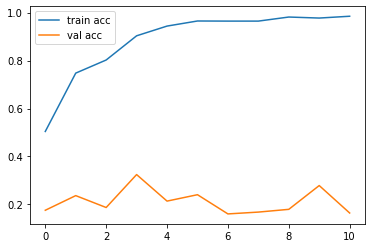

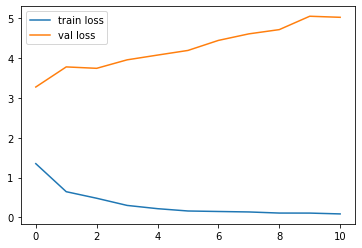

In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

#plt.savefig('vgg-acc-rps-1.png')

plt.show()


# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
#plt.savefig('vgg-loss-rps-1.png')
plt.show()

# Model Evaluation

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

9/9 [==============================] - 4s 411ms/step - loss: 5.3865 - accuracy: 0.2246


[5.386519908905029, 0.2246376872062683]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
#print(test_x)
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

[3 5 4 4 4 0 4 5 3 3 4 4 4 4 4 4 4 4 5 4 3 4 5 4 4 4 3 4 4 5 4 4 4 5 0 4 5
 4 5 5 3 5 4 4 4 3 3 4 4 4 4 4 4 4 3 4 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 2 0 0 1 1 1 5 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 2 1 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 2 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 5 2 0 0 0 0 0 0 0
 4 5 2 2 0 2 2 2 2 3 2 3 2 2 3 2 5 2 2 2 5 2 2 2 2 3 2 2 2 2 3 2 0 2 2 0 5
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 4 5 5
 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5]


In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[ 2 11 50  6  0  0]
 [ 0 15  5  0  0  0]
 [ 0  1  4 24  2  1]
 [ 9  0  2 15 35 14]
 [35  0  0  1  0  1]
 [10  1  1  4  1 26]]


<class 'numpy.ndarray'>
[4]
Drone


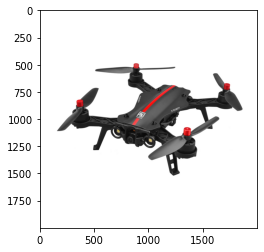

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
path="/content/drive/MyDrive/drone/00000013.jpg"

from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

result = model.predict([prepare(path)])
d=image.load_img(path)
plt.imshow(d)
x=np.argmax(result,axis=1)
print(type(x))

print(x)
if x == 0:
  print("Missile")
elif x==1:
  print("Rocket")
elif x==2:
  print("Passenger Plane")
elif x==3:
  print("Helicopter")
elif x==4:
  print("Drone")
else:
  print("Fighter Jet")